In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import matplotlib.pyplot as plt
import os
import time
import data
from data import select_top

def linear_regression(y, x, const = True): 
#y should be in the format of a column from dataframe
#x should be tuple of columns
    X = np.column_stack(x)
    if const:
        X = sm.add_constant(X)
    model = sm.OLS(y, X)
    results = model.fit()
    return results

Data = data.download()
raw_US 	=	Data['raw_US']
raw_states 	=	Data['raw_states']
raw_County 	=	Data['raw_County']
raw_Global 	=	Data['raw_Global']
fatality_rates_US = Data['fatality_rates_US']
EU 	=	Data['EU']
EU_nation 	=	Data['EU_nation']
cty_population 	=	Data['cty_population']
pop_dict 	=	Data['pop_dict']
states_D 	=	Data['states_D']
states_R 	=	Data['states_R']
US_state_neighbors 	=	Data['US_state_neighbors']
state_code 	=	Data['state_code']
new_weekly_cases_state 	=	Data['new_weekly_cases_state']
new_weekly_deaths_state 	=	Data['new_weekly_deaths_state']
percent_weekly_cases 	=	Data['percent_weekly_cases']
change_in_new_cases 	=	Data['change_in_new_cases']
new_cases_per_mil 	=	Data['new_cases_per_mil']
new_death_per_mil 	=	Data['new_death_per_mil']
cases_D 	=	Data['cases_D']
cases_R 	=	Data['cases_R']
pop_D 	=	Data['pop_D']
pop_R 	=	Data['pop_R']
wk_cases_county 	=	Data['wk_cases_county']
wk_deaths_county 	=	Data['wk_deaths_county']
cases_cty_thou 	=	Data['cases_cty_thou']


Parsing through data for US states...

Data downloaded in  16.83731198310852


In [2]:
world = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')


In [3]:
world

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
5,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
6,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
7,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
8,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
9,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


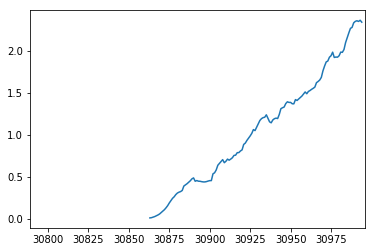

In [4]:
world.loc[world['iso_code'] == "USA" ]['new_tests_per_thousand'].rolling(7).mean().plot()

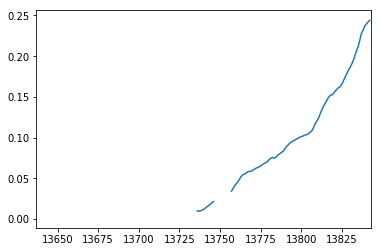

In [5]:
world.loc[world['location']=='India']['new_tests_per_thousand'].rolling(7).mean().plot()
